In [11]:
import pyarrow.parquet as pq
import pyarrow as pa
import pyarrow.csv as csv
import pyarrow.compute as pc

In [3]:
metrics = pa.array(
    [
        "Revenue",
        "CostOfRevenue",
        "OperatingIncome",
        "NetIncome",
        "EPSBasic",
        "OperatingCashFlow",
        "CAPEX",
        "Assets",
    ]
)

In [4]:
table = pq.read_table(
    "C:/Users/andre/Downloads/entire_universe_standardized_PIT.parquet"
)

In [6]:
metric_table = table.filter(pc.is_in(table["metric"], metrics))

In [7]:
groups = metric_table.group_by(["fiscal_period", "metric"])

In [8]:
preliminary_and_XBRL_counts = groups.aggregate([("preliminary", "sum"), ("XBRL", "sum")])

In [9]:
csv.write_csv(
    preliminary_and_XBRL_counts, "metric_counts.csv"
)

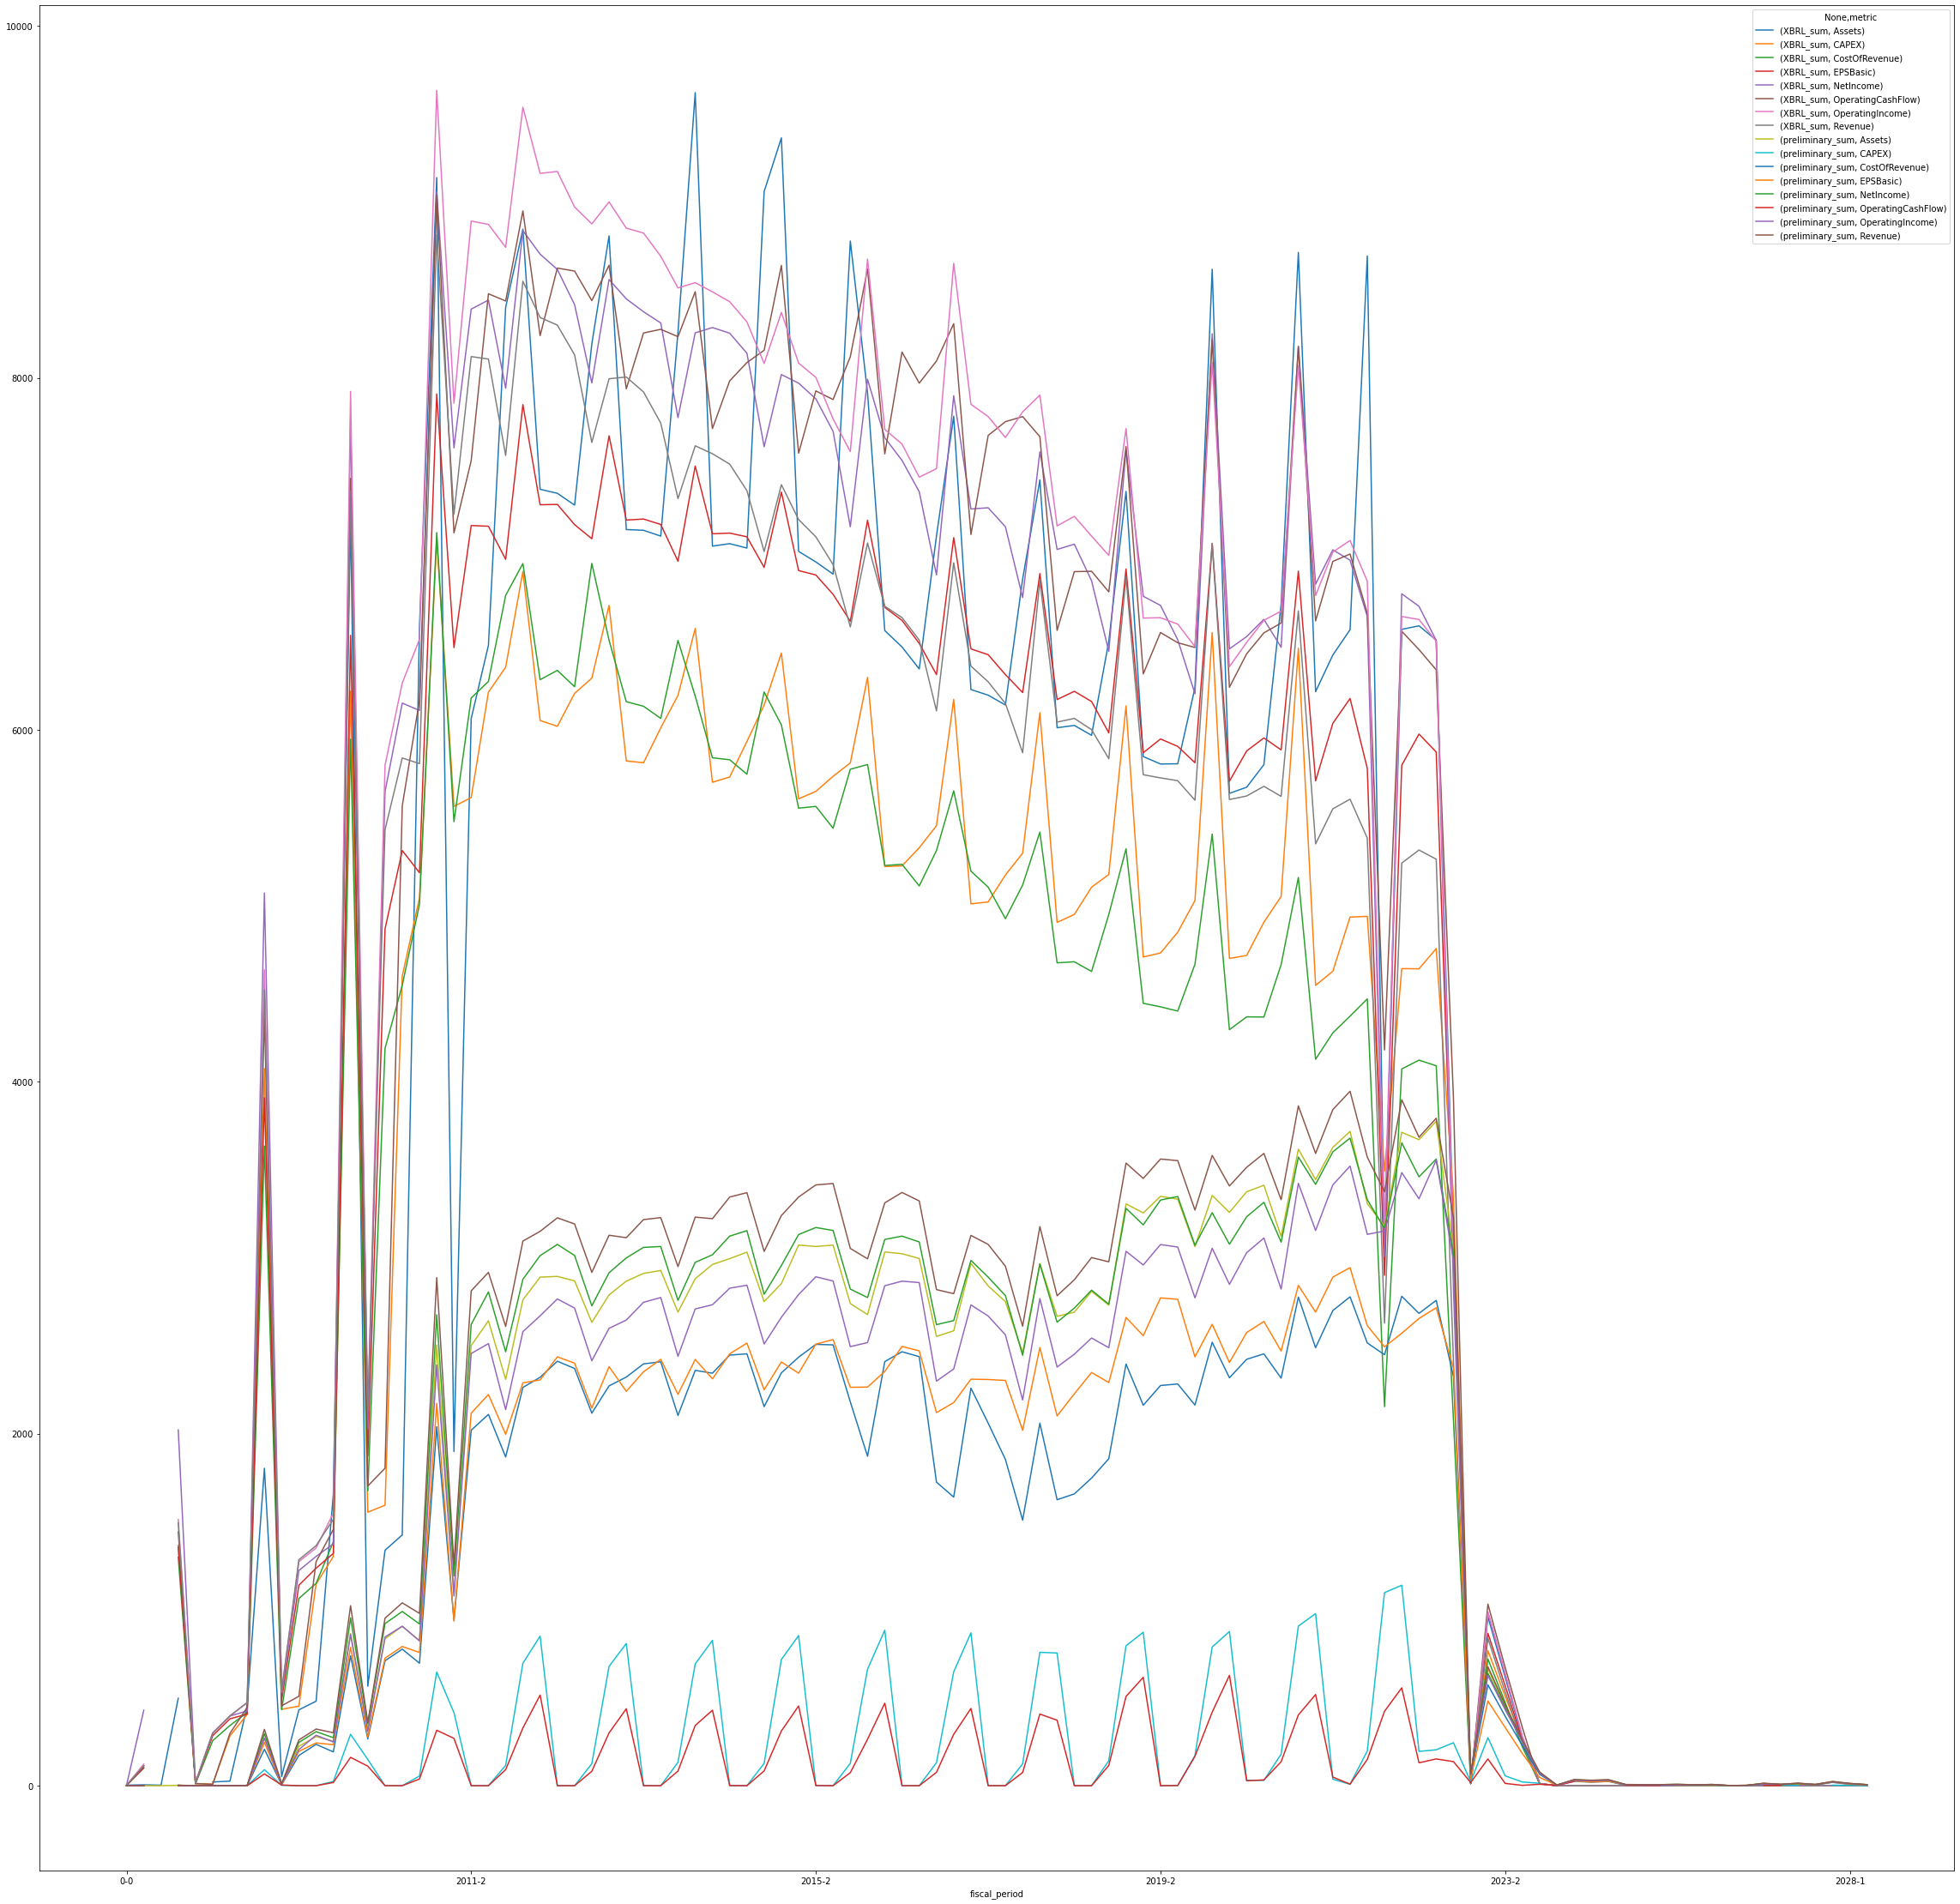

In [17]:
preliminary_and_XBRL_counts.to_pandas().pivot_table(index='fiscal_period', columns='metric').plot(figsize=(40,40))